In [192]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  
password = getpass.getpass()

import numpy as np

········


In [193]:
# In this lab, you will be using the Sakila database of movie rentals.

# In order to optimize our inventory, we would like to know which films will be rented next month 
# and we are asked to create a model to predict it.

In [194]:
# Task 1: Create a query or queries to extract the information you think may be relevant for building the prediction model. 
    # It should include some film features and some rental features. Use the data from 2005.
# See SQL

In [195]:
# Task 2: Create a query to get the list of films and a boolean indicating if it was rented last month (May 2005). 
    # This would be our target variable.

In [196]:
# Task 3: Read the data into a Pandas dataframe.

In [197]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
query = '''SELECT f.title, f.rental_duration, f.rental_rate, f.length, f.rating, c.name AS category, r.rental_date,
(
SELECT
CASE WHEN r.rental_date BETWEEN '2005-05-00 00:00:00' AND '2005-06-00 00:00:00' then 1
else 0 end as rented_may) as rentals_may FROM film f 
LEFT JOIN inventory i ON f.film_id = i.film_id
LEFT JOIN film_category f_c ON f_c.film_id = f.film_id
LEFT JOIN category c ON f_c.category_id = c.category_id
LEFT JOIN rental r ON r.inventory_id = i.inventory_id
GROUP BY f.title
ORDER BY f.title;'''

data = pd.read_sql_query(query, engine)
data.head(50)

,title,rental_duration,rental_rate,length,rating,category,rental_date,rentals_may
0,ACADEMY DINOSAUR,6,0.99,86,PG,Documentary,2005-07-08 19:03:15,0
1,ACE GOLDFINGER,3,4.99,48,G,Horror,2005-08-01 04:24:47,0
2,ADAPTATION HOLES,7,2.99,50,NC-17,Documentary,2005-07-27 01:21:19,0
3,AFFAIR PREJUDICE,5,2.99,117,G,Horror,2005-07-12 02:40:41,0
4,AFRICAN EGG,6,2.99,130,G,Family,2005-05-28 07:53:38,1
5,AGENT TRUMAN,3,2.99,169,PG,Foreign,2005-05-26 23:23:56,1
6,AIRPLANE SIERRA,6,4.99,62,PG-13,Comedy,2005-08-02 07:34:19,0
7,AIRPORT POLLOCK,6,4.99,54,R,Horror,2005-05-25 19:37:47,1
8,ALABAMA DEVIL,3,2.99,114,PG-13,Horror,2005-07-10 12:10:11,0
9,ALADDIN CALENDAR,6,4.99,63,NC-17,Sports,2005-06-17 08:06:53,0


In [198]:
data.shape

(1000, 8)

In [199]:
# Change datatype of the column 'rentals_may' from integer into boolean:
data_new = data.copy()                                      
data_new['rentals_may'] = data_new['rentals_may'].apply(bool)                 
print(data_new) 

                 title  rental_duration  rental_rate  length rating  \
0     ACADEMY DINOSAUR                6         0.99      86     PG   
1       ACE GOLDFINGER                3         4.99      48      G   
2     ADAPTATION HOLES                7         2.99      50  NC-17   
3     AFFAIR PREJUDICE                5         2.99     117      G   
4          AFRICAN EGG                6         2.99     130      G   
..                 ...              ...          ...     ...    ...   
995     YOUNG LANGUAGE                6         0.99     183      G   
996         YOUTH KICK                4         0.99     179  NC-17   
997       ZHIVAGO CORE                6         0.99     105  NC-17   
998  ZOOLANDER FICTION                5         2.99     101      R   
999          ZORRO ARK                3         4.99      50  NC-17   

        category         rental_date  rentals_may  
0    Documentary 2005-07-08 19:03:15        False  
1         Horror 2005-08-01 04:24:47       

In [200]:
# In order to work in a logistic regression model, I change the boolean to datatype string:

data_st = data_new.copy()                                      
data_st['rentals_may'] = data_st['rentals_may'].apply(str)                 
print(data_st)

                 title  rental_duration  rental_rate  length rating  \
0     ACADEMY DINOSAUR                6         0.99      86     PG   
1       ACE GOLDFINGER                3         4.99      48      G   
2     ADAPTATION HOLES                7         2.99      50  NC-17   
3     AFFAIR PREJUDICE                5         2.99     117      G   
4          AFRICAN EGG                6         2.99     130      G   
..                 ...              ...          ...     ...    ...   
995     YOUNG LANGUAGE                6         0.99     183      G   
996         YOUTH KICK                4         0.99     179  NC-17   
997       ZHIVAGO CORE                6         0.99     105  NC-17   
998  ZOOLANDER FICTION                5         2.99     101      R   
999          ZORRO ARK                3         4.99      50  NC-17   

        category         rental_date rentals_may  
0    Documentary 2005-07-08 19:03:15       False  
1         Horror 2005-08-01 04:24:47       Fa

In [201]:
data_st.head()

,title,rental_duration,rental_rate,length,rating,category,rental_date,rentals_may
0,ACADEMY DINOSAUR,6,0.99,86,PG,Documentary,2005-07-08 19:03:15,False
1,ACE GOLDFINGER,3,4.99,48,G,Horror,2005-08-01 04:24:47,False
2,ADAPTATION HOLES,7,2.99,50,NC-17,Documentary,2005-07-27 01:21:19,False
3,AFFAIR PREJUDICE,5,2.99,117,G,Horror,2005-07-12 02:40:41,False
4,AFRICAN EGG,6,2.99,130,G,Family,2005-05-28 07:53:38,True


In [202]:
# Task 4: Analyze extracted features and transform them. 
    # You may need to encode some categorical variables, or scale numerical variables.

In [203]:
# Check for NaN and None:
data_st.isna().sum()
# No NaN being found!

title               0
rental_duration     0
rental_rate         0
length              0
rating              0
category            0
rental_date        42
rentals_may         0
dtype: int64

In [204]:
data_st = data_st.drop('rental_date', axis=1)

In [205]:
#build new df for columns with rentals_may=True (data for may rentals):

#data_may=data_st[data_st['rentals_may']==True]
#data_may.head()
#data_may.shape

# didn't work, so I commented it out and rerun everything.

In [206]:
#getting rid of duplicates:
data_st = data_st.drop_duplicates()
data_st = data_st.reset_index(drop=True)

In [207]:
data_st.shape

(1000, 7)

In [208]:
data_st.head()

,title,rental_duration,rental_rate,length,rating,category,rentals_may
0,ACADEMY DINOSAUR,6,0.99,86,PG,Documentary,False
1,ACE GOLDFINGER,3,4.99,48,G,Horror,False
2,ADAPTATION HOLES,7,2.99,50,NC-17,Documentary,False
3,AFFAIR PREJUDICE,5,2.99,117,G,Horror,False
4,AFRICAN EGG,6,2.99,130,G,Family,True


In [209]:
#Checking categorical data values
data_st['category'].value_counts()
data_st['rating'].value_counts()
data_st['title'].value_counts()
data_st['rentals_may'].value_counts()

False    775
True     225
Name: rentals_may, dtype: int64

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

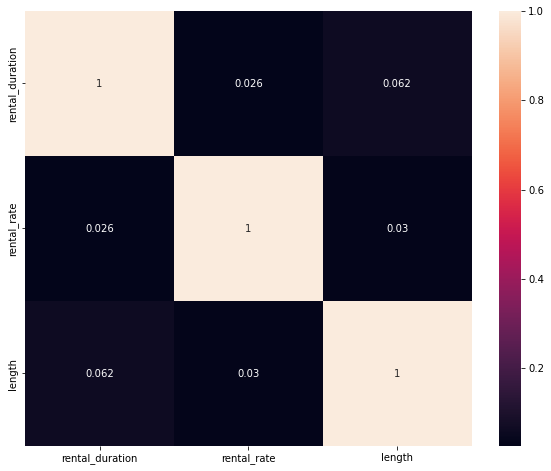

In [211]:
corr_matrix=data_st.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [212]:
#x-y-split & train-test-split:

y = data_st['rentals_may']
X = data_st.drop(['rentals_may', 'title'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [213]:
#Num-cat-split
import numpy as np
X_num = data_st.select_dtypes(include = np.number)
X_cat = data_st.select_dtypes(include = object)

X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(include = object)
X_test_cat  = X_test_df.select_dtypes(include = object)


In [214]:
# Scaling numerical data
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num) 
X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
X_train_scaled.head()

,rental_duration,rental_rate,length
0,0.50,1.0,0.769784
1,0.75,0.0,0.151079
2,0.00,0.5,0.258993
3,0.50,1.0,0.223022
4,0.25,0.0,0.733813


In [215]:
# encoding categorical data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
onehot_encoded = pd.DataFrame(encoded_cat, columns=cols)
onehot_encoded.head()

,rating_NC-17,rating_PG,rating_PG-13,rating_R,category_Animation,category_Children,category_Classics,category_Comedy,category_Documentary,category_Drama,category_Family,category_Foreign,category_Games,category_Horror,category_Music,category_New,category_Sci-Fi,category_Sports,category_Travel
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
#concat
X_train_treated = pd.concat([X_train_scaled, onehot_encoded], axis=1)

In [217]:
X_train_treated.shape

(800, 22)

In [218]:
# Task 5: Create a logistic regression model to predict this variable from the cleaned data. 

In [219]:
# building the modell
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr')

classification.fit(X_train_treated, y_train)

LogisticRegression(multi_class='ovr', random_state=0)

In [220]:
# apply scaler to X_test_num
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_test_scaled.head()

,rental_duration,rental_rate,length
0,0.00,0.0,0.374101
1,0.75,0.5,0.964029
2,0.25,0.5,0.316547
3,1.00,0.5,0.618705
4,0.25,0.0,0.453237


In [221]:
# apply encoded to X_test_cat 
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test = pd.DataFrame(encoded_test_cat, columns=cols)
onehot_encoded_test.head()


# I don't know what happened here?!? 

,rating_NC-17,rating_PG,rating_PG-13,rating_R,category_Animation,category_Children,category_Classics,category_Comedy,category_Documentary,category_Drama,category_Family,category_Foreign,category_Games,category_Horror,category_Music,category_New,category_Sci-Fi,category_Sports,category_Travel
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
# combine scaled and onehot_encoded portions of X_test
X_test_treated = pd.concat([X_test_scaled, onehot_encoded_test], axis=1)

In [223]:
predictions = classification.predict(X_test_treated)
predictions 
classification.score(X_test_treated, y_test) 

0.745

In [224]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[149,   0],
       [ 51,   0]], dtype=int64)

In [225]:
# Task 6: Evaluate the results.

In [226]:
# classification.score == accuracy of prediction
(149+0)/len(predictions)

0.745

In [227]:
y_test.value_counts()

False    149
True      51
Name: rentals_may, dtype: int64

In [228]:
# The prediction correctly shows 159 rented films in may and 0 non-rented films in may.
# The prediction falsely shows 0 rented films in may and 51 non-rented films in may.
# The accuracy of the prediction is by 74,5 % percent, which is not very high.
# Considering the imbalance of the classes (149 - 51), it is no surprise though.

In [229]:
# Extra: try to improve the modell via KNN

In [238]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=30, weights='uniform')
clf.fit(X_train_scaled, y_train)
predictions_clf = clf.predict(X_test_scaled)
clf.score(X_test_scaled, y_test)

0.745

In [239]:
# The highest score with neighbors is as high as before - no improvement via KNN!